Populating the interactive namespace from numpy and matplotlib


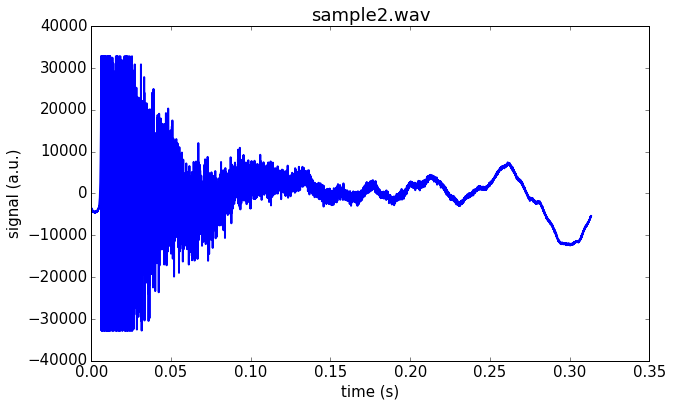

In [19]:
#boilerplate to have the right functions available
%matplotlib inline
import matplotlib.pyplot as plt #plotting
import numpy as np #array functions
import wave #for loading audio files
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
pylab.rcParams['font.size'] = 15

filename = "sample2.wav"
spf = wave.open(filename,'r') # the file I selected is saved in filename

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')

spf = wave.open(filename,'r') # the file I selected is saved in filename

#generate a time axis
time = np.linspace(0., float(signal.size)/spf.getframerate(), signal.size)

#plot the signal

plt.title(filename)
plt.plot(time, signal)
plt.xlabel("time (s)")
plt.ylabel("signal (a.u.)");

## Plot the signal in dB
Use the maximum of the signal, $s_{max}$ as a reference and calculate the signal in dB ($ref\,s_{max}$). To avoid a zero in the argument of the $\log_{10}$ we add a some number $\epsilon$.

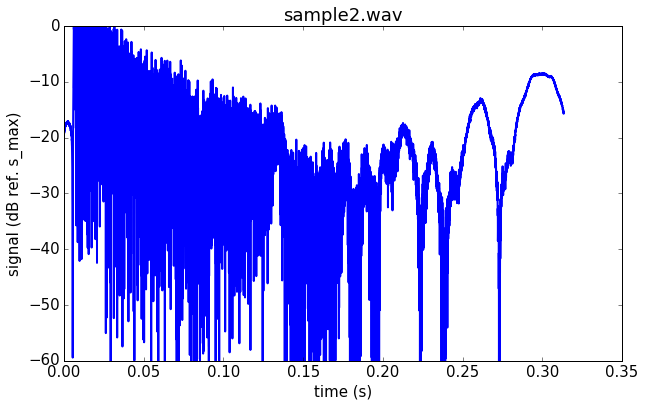

In [23]:
eps =1e-60
signal_ref = np.max(signal)
signal_db = 10.*np.log10((signal**2.)/(signal_ref**2.)+eps)

plt.title(filename)
plt.plot(time, signal_db)
plt.xlabel("time (s)")
plt.ylabel("signal (dB ref. s_max)")
plt.ylim(-60,0);

## Analayze the data

The interactive plot below allows to fit graphically a linear slope to the data.

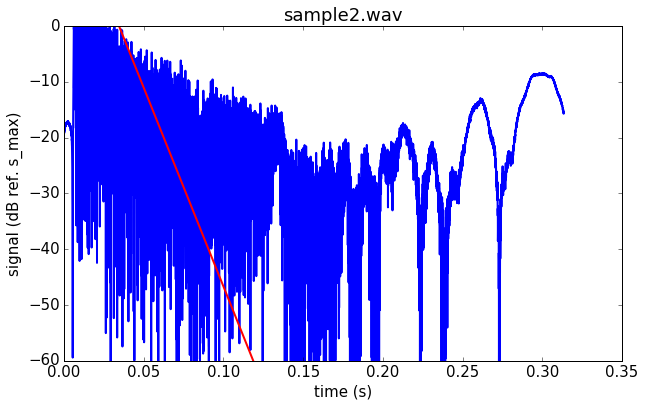

In [54]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
def plot_slope(slope, offset):
    plt.title(filename)
    plt.plot(time, signal_db)
    plt.xlabel("time (s)")
    plt.ylabel("signal (dB ref. s_max)")
    
    x=np.linspace(0,time[-1],100.)
    y= slope*(x-offset)
    plt.plot(x,y,'r')
    plt.ylim(-60,0);
    plt.show();
    
interact(plot_slope, slope = (-1000.,0.,.1), offset = (0.,time[-1]/3.,time[-1]/300.));